## Задание 3. Какое это распределение?

#### Описание задачи:

В этом датасете – количество просмотров, лайков и дизлайков для различных проектов нормативно-правовых актов, размещённых на сайте regulation.gov.ru. Предположите, какие распределения порождают эти переменные и протестируйте свои гипотезы.

In [1]:
# Импорт библиотек
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import logser

%matplotlib inline
matplotlib.style.use('seaborn')

In [2]:
# Чтение данных
df = pd.read_csv('engagement.csv', index_col='id')
df.head()

,views,likes,dislikes
id,,,
5038,332,0,0
5039,442,0,0
5040,390,0,0
5041,340,0,0
5042,272,0,0


In [3]:
# Общая информация по датафрейму: размеры, типы данных, пропущенные значения
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88648 entries, 5038 to 113136
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   views     88648 non-null  int64
 1   likes     88648 non-null  int64
 2   dislikes  88648 non-null  int64
dtypes: int64(3)
memory usage: 2.7 MB


In [4]:
# Описательные статистики переменных
df.describe()

,views,likes,dislikes
count,88648.000000,88648.000000,88648.000000
mean,717.460394,5.062043,9.238877
std,4147.222807,1118.622424,1274.631693
min,0.000000,0.000000,0.000000
25%,189.000000,0.000000,0.000000
50%,326.000000,0.000000,0.000000
75%,665.000000,0.000000,0.000000
max,806103.000000,330826.000000,371683.000000


<AxesSubplot:>

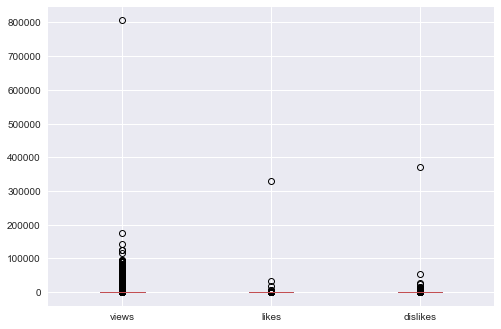

In [5]:
# Распределение переменных на ящике с усами
df.boxplot()

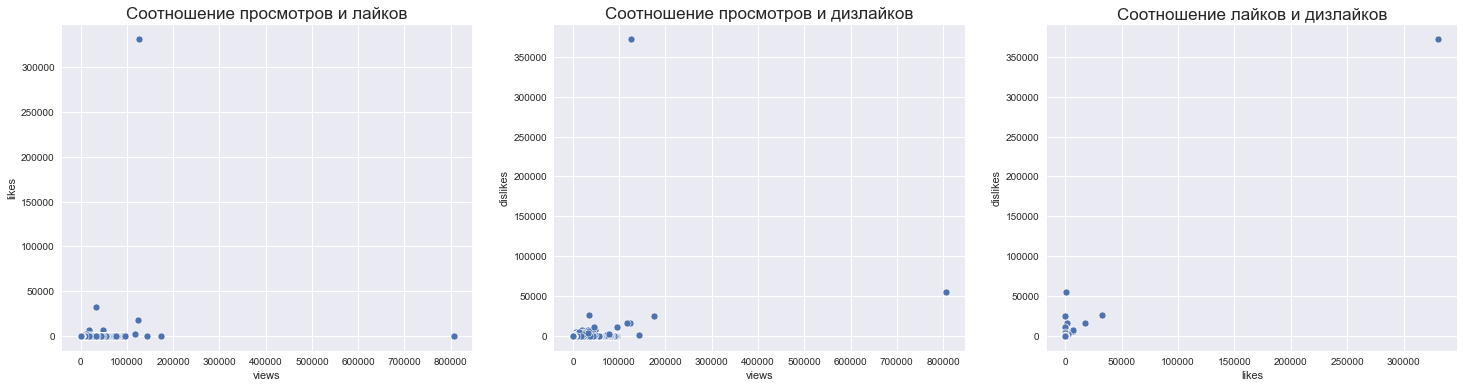

In [6]:
# Посмотрим соотношение между переменными

# Размерность и размеры графика
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

# Графики
sns.scatterplot(data=df, x='views', y='likes', ax=axs[0])
sns.scatterplot(data=df, x='views', y='dislikes', ax=axs[1])
sns.scatterplot(data=df, x='likes', y='dislikes', ax=axs[2])

# Названия
axs[0].set_title('Соотношение просмотров и лайков', size=17)
axs[1].set_title('Соотношение просмотров и дизлайков', size=17)
axs[2].set_title('Соотношение лайков и дизлайков', size=17);

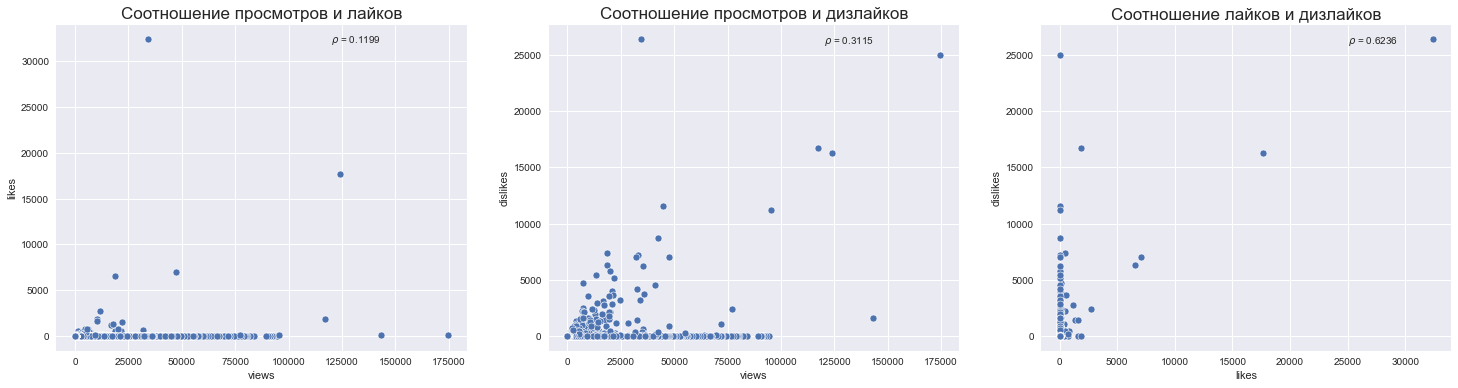

In [7]:
# Посмотрим соотношение между переменными, убрав экстремальные выбросы

# Подготовка данных
data = df[(df.views < df.views.max()) & (df.likes < df.likes.max()) & (df.likes < df.dislikes.max())]
corr = data.corr()

# Размерность и размеры графика
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(25, 6))

# Графики
sns.scatterplot(data=data, x='views', y='likes', ax=axs[0])
sns.scatterplot(data=data, x='views', y='dislikes', ax=axs[1])
sns.scatterplot(data=data, x='likes', y='dislikes', ax=axs[2])

# Названия
axs[0].set_title('Соотношение просмотров и лайков', size=17)
axs[1].set_title('Соотношение просмотров и дизлайков', size=17)
axs[2].set_title('Соотношение лайков и дизлайков', size=17)

# Коэффициент корреляции
axs[0].annotate(r'$\rho$ = ' + str(round(corr.iloc[1, 0], 4)), xy=(120000,32000))
axs[1].annotate(r'$\rho$ = ' + str(round(corr.iloc[2, 0], 4)), xy=(120000,26000))
axs[2].annotate(r'$\rho$ = ' + str(round(corr.iloc[2, 1], 4)), xy=(25000,26000));

### Первые выводы

* Датафрейм представляет собой матрицу размером 88648 х 3. Пропущенных значений нет

* Все три переменные представляют собой числовые данные, при этом значения **дискретные**, а не непрерывные (количество просмотров, лайков, дизлайков), поэтому стандартные тесты модуля scipy.stats, работающие только для непрарывных величин, использовать не получится. В целом, проблемой представляется ограниченность библиотечных методов для анализа дискретных величин

* Все три переменные имеют длинный правый хвост с выбросами вправо

* Значимой корреляции между количеством просмотров и лайков / дизлайков не наблюдается. Также не скоррелированы между собой экстремальные выбосы: законопроект с наибольшим количеством лайков или дизлайков не имеет при этом наибольшее количество просмотров.

* Однако наблюдается заметная прямая связь между количеством лайков и дизлайков. Экстремальный выброс также - законопроект, который имеет максимальное количество лайков и дизлайков. Также интересно отметить, что пользователи охотнее ставят дизлайки, нежели лайки: есть большое количество законопроектов с минимальным количеством лайков и при этом большим количеством дизлайков.

### Количество просмотров (views)

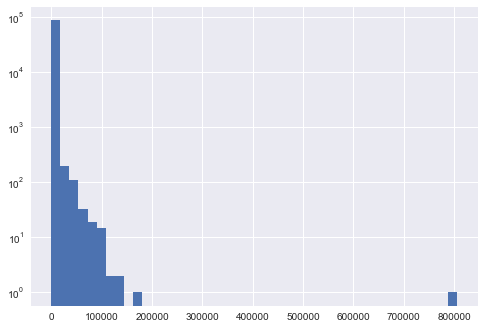

In [8]:
# Гистограмма распределения переменной views (прологорифмирована по шкале y)
plt.hist(df.views, bins=45, log=True);

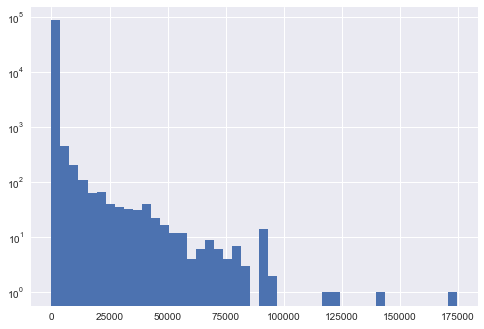

In [9]:
# Уберем далеко отстоящий правый выброс
plt.hist(data.views, bins=45, log=True);

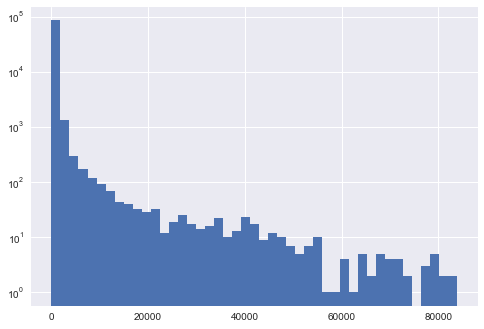

In [10]:
# Чтобы увидеть распределение значений там, где сконцентрировано большинство значений, отфильтруем правый хвост
plt.hist(data.views[data.views < 85000], bins=45, log=True);

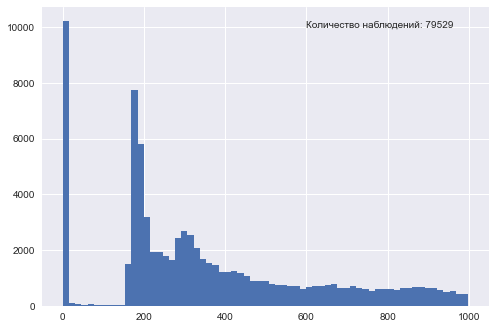

In [11]:
# Посмотрим ещё более узкий коридор, чтобы проверить, как распределены значения около нуля
plt.hist(data.views[data.views < 1000], bins=65)
plt.annotate('Количество наблюдений: ' + str(len(data.views[data.views < 1000])), xy=(600,10000));

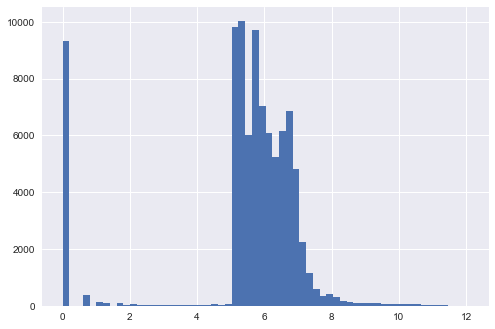

In [12]:
# Прологарифмируем переменную по шкале x (прибавив константу 1, так как есть значения 0)
plt.hist(np.log(data['views'] + 1), bins=60);

### Выводы по переменной просмотры:

* Общее распределение переменной views похоже на логаритмическое дискретное распределение (logser - пример распределения ниже)

* Однако при фильтрации правового хвоста на минимальных значениях наблюдается мультимодальность: первая мода - значение 0, вторая мода - значение около 180, наконец небольшая третья мода (которая сохраняется при разных вариантах количества bins) - значение около 300. Эта мультимодальность видна также при логарифмировании переменной "количество просмотров"

* Это говорит о том, что существует ощутимый разрыв между законопроектами, которые остаются без внимания граждан, и теми, количество посещений которых выше 180. Распределение количества просмотров выше 180 похоже на распределение Пуассона

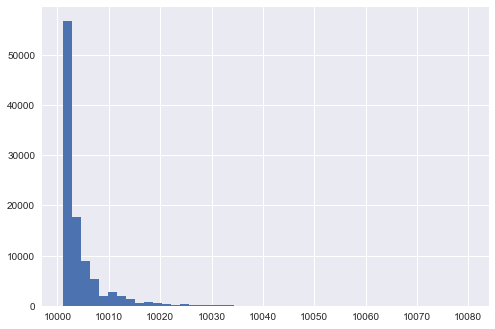

In [13]:
# теоретические частоты logser-распределения
logser_data = logser.rvs(p=0.9, size=100000, loc=10000)
plt.hist(logser_data, bins=45);

### Количество лайков и дизлайков (likes, dislikes)

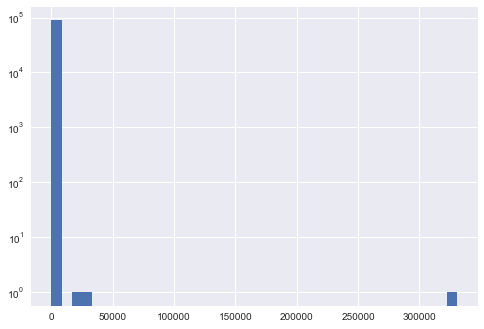

In [14]:
# Гистограмма распределения количества лайков (прологарифмирована по y)
plt.hist(df.likes, bins=40, log=True);

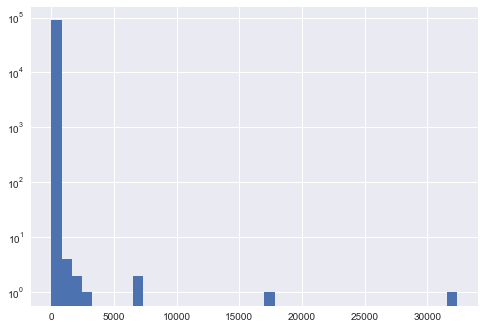

In [15]:
# Распределение переменной после избавления от крайнего правого выброса
plt.hist(data.likes, bins=40, log=True);

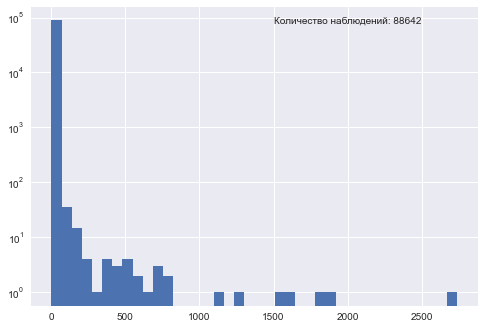

In [22]:
# Распределение и здесь похоже на logser, однако есть отдельно стоящие выбросы справа: отдельные законопроекты,
# которые получили аномально большое количество лайков

# Попробуем убрать эти значения из гистограммы
plt.hist(data.likes[data.likes < 5000], bins=40, log=True)
plt.annotate('Количество наблюдений: ' + str(len(data.likes[data.likes < 5000])), xy=(1500,80000));

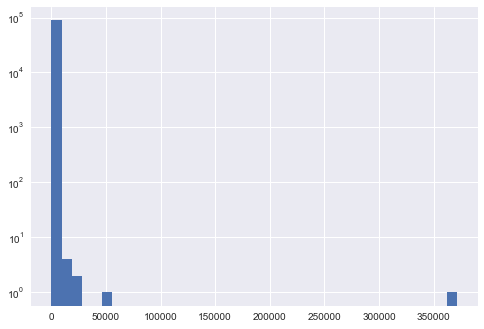

In [25]:
# То же самое для переменной дизлайки

# Гистограмма распределения для всех значений
plt.hist(df.dislikes, bins=40, log=True);

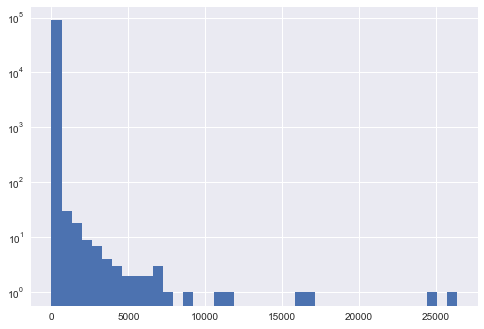

In [26]:
# Гистограмма без экстремального правого выброса
plt.hist(data.dislikes, bins=40, log=True);

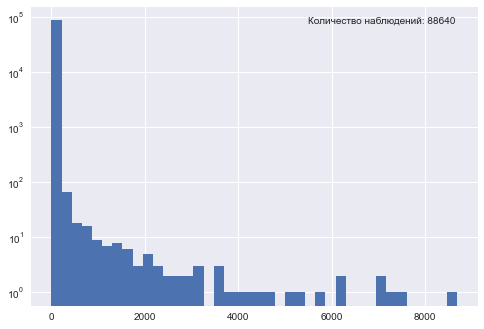

In [34]:
# Гистограмма после фильтрации выбросов справа
plt.hist(data.dislikes[data.dislikes < 10000], bins=40, log=True);
plt.annotate('Количество наблюдений: ' + str(len(data.dislikes[data.dislikes < 10000])), xy=(5500,80000));

### Выводы по количеству лайков и дизлайков:

* Распределение лайков и дизлайков, в отличие от распределения просмотров, не обладает выраженной мультимодальностью. Распределение обеих переменных так же похоже на распределение logser до и после избавления от выбросов.

* Модальным значением в обеих случаях является значение 0, что говорит о том, что чаще всего законопроекты получают ноль лайков и ноль дизлайков, при этом вероятность получения большего количества лайков и дизлайков падает с частотами, похожими на logser-распределение